## Autograd

In [1]:
import torch

In [2]:
x = torch.randn(3,requires_grad = True)

In [3]:
y = x+2
print(y)

tensor([1.8386, 0.6306, 0.9933], grad_fn=<AddBackward0>)


In [4]:
z = y*y*2

In [20]:
print(x.backward())

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [6]:
#when we want to update out weight then their is no need of grad func_
#there are three ways
#x.reuires_grad(false)
#x.detach()
#witrh torch.no_grad():


In [7]:
 x = torch.randn(3,requires_grad = True)
print(x)
x.requires_grad_(False)

tensor([-0.3810, -1.4852,  0.1444], requires_grad=True)


tensor([-0.3810, -1.4852,  0.1444])

In [8]:
 x = torch.randn(3,requires_grad = True)
print(x)
x.detach()

tensor([0.5425, 1.9372, 1.9135], requires_grad=True)


tensor([0.5425, 1.9372, 1.9135])

In [9]:
 x = torch.randn(3,requires_grad = True)
print(x)
with torch.no_grad():
    y = x+2 #some operation is required
    print(y)

tensor([0.6317, 0.4076, 0.7472], requires_grad=True)
tensor([2.6317, 2.4076, 2.7472])


In [10]:
weights = torch.ones(4,requires_grad= True)

for epoch in range(3):
    model_output = (weights*4).sum()
    model_output.backward()
    print(weights.grad)
    #print(model_output)
    

tensor([4., 4., 4., 4.])
tensor([8., 8., 8., 8.])
tensor([12., 12., 12., 12.])


In [77]:
weights = torch.ones(4,requires_grad= True)

for epoch in range(3):
    model_output = (weights*4).sum()
    model_output.backward()
    
    print(weights.grad)
    weights.grad.zero_()
    
    #print(model_output)

tensor([4., 4., 4., 4.])
tensor([4., 4., 4., 4.])
tensor([4., 4., 4., 4.])


### Backpropogation

In [12]:
#generally their are three steps:
#1.forward Pass: compute tge lossses
#2.computation of local gradinents
#3.backward pass : compute (dLoss/dweights) using chain rule


In [13]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0,requires_grad = True)

#following the above steps
y_hat = w*x
loss = (y_hat-y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [14]:
loss.backward()

In [15]:
w.grad

tensor(-2.)

## Gradient Decent Algorithm

In [16]:
 import numpy as np

In [85]:
X = torch.tensor([[1],[2],[3],[4]],dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype = torch.float32) 



#w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)

In [86]:
(X[0][0]).item()

1.0

In [87]:
n_samples, n_fetures = X.shape
print(n_fetures,n_samples)

1 4


In [88]:
X_test = torch.tensor([5],dtype = torch.float32)

In [89]:
input_size = n_fetures
output_size = n_fetures

In [90]:

#def forward(x):
 #   return w*x
#model = nn.Linear(input_size,output_size)

In [104]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.lin = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)
model = LinearRegression(input_size,output_size)

def loss(y,y_predict):
    return ((y_predict-y)**2).mean()

def gradient(x,y,y_predict):
    return np.dot(2*x,y_predict-y).mean()


In [105]:
print(model(X_test).item())


-0.6202086210250854


In [106]:
learning_rate = 0.01
no_itr = 2000

In [107]:
loss = nn.MSELoss()


In [108]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [109]:

for epoch in range(no_itr):
    #prediction = forward pass
    y_pred  = model(X)
    
    #loss
    l = loss(Y,y_pred)
    #gradient
    l.backward()
    
    #update weights
    optimizer.step()
    
    optimizer.zero_grad()
    

    
    if epoch % 100 ==0:
        [w,b] = model.parameters() 
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f},loss={l:.8f}')
print(model(X_test).item())

epoch 1: w = 0.139,loss=32.78094864
epoch 101: w = 1.776,loss=0.07258532
epoch 201: w = 1.834,loss=0.03984851
epoch 301: w = 1.877,loss=0.02187636
epoch 401: w = 1.909,loss=0.01200985
epoch 501: w = 1.933,loss=0.00659328
epoch 601: w = 1.950,loss=0.00361963
epoch 701: w = 1.963,loss=0.00198714
epoch 801: w = 1.973,loss=0.00109091
epoch 901: w = 1.980,loss=0.00059890
epoch 1001: w = 1.985,loss=0.00032879
epoch 1101: w = 1.989,loss=0.00018050
epoch 1201: w = 1.992,loss=0.00009909
epoch 1301: w = 1.994,loss=0.00005440
epoch 1401: w = 1.995,loss=0.00002987
epoch 1501: w = 1.997,loss=0.00001640
epoch 1601: w = 1.998,loss=0.00000900
epoch 1701: w = 1.998,loss=0.00000494
epoch 1801: w = 1.999,loss=0.00000271
epoch 1901: w = 1.999,loss=0.00000149
9.998448371887207


In [1]:
import torch
import torch.nn as nn

In [2]:
import numpy as np

In [7]:
!pip install sklearn

In [8]:
from sklearn import datasets

In [9]:
import matplotlib.pyplot as plt

In [26]:
x_value, y_value = datasets.make_regression(n_samples = 100,n_features = 1,noise = 20,random_state = 1)

In [28]:
#trasforms to tensor
X = torch.from_numpy(x_value.astype(np.float32))
Y = torch.from_numpy(y_value.astype(np.float32))

In [35]:
X

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [36]:
Y.shape

torch.Size([100])

In [38]:
Y = Y.view(Y.shape[0],1)

In [40]:
X.shape

torch.Size([100, 1])

In [41]:
n_samples, n_features = X.shape

In [43]:
#create a model

input_size = n_features
out_size = 1
model = nn.Linear(input_size,out_size)

In [44]:
#create a loss and optimizer function
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [60]:
#training pipe line
l= torch.tensor(1.0)
num_epochs = 1000
for epoch in range(num_epochs):
    #forward pass
    y_predict = model(X)
    loss = criterion(y_predict,Y)
    #backwardpass
    loss.backward()
    
    #update zhe wirghts
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) & 100 == 0:
        print(f'epoch : {epoch+1},loss = {loss.item():.4f}')

print(model(l))

epoch : 1,loss = 332.5676
epoch : 2,loss = 332.5676
epoch : 3,loss = 332.5676
epoch : 8,loss = 332.5676
epoch : 9,loss = 332.5676
epoch : 10,loss = 332.5676
epoch : 11,loss = 332.5676
epoch : 16,loss = 332.5676
epoch : 17,loss = 332.5676
epoch : 18,loss = 332.5676
epoch : 19,loss = 332.5676
epoch : 24,loss = 332.5676
epoch : 25,loss = 332.5676
epoch : 26,loss = 332.5676
epoch : 27,loss = 332.5676
epoch : 128,loss = 332.5676
epoch : 129,loss = 332.5676
epoch : 130,loss = 332.5676
epoch : 131,loss = 332.5676
epoch : 136,loss = 332.5676
epoch : 137,loss = 332.5676
epoch : 138,loss = 332.5676
epoch : 139,loss = 332.5676
epoch : 144,loss = 332.5676
epoch : 145,loss = 332.5676
epoch : 146,loss = 332.5676
epoch : 147,loss = 332.5676
epoch : 152,loss = 332.5676
epoch : 153,loss = 332.5676
epoch : 154,loss = 332.5676
epoch : 155,loss = 332.5676
epoch : 256,loss = 332.5676
epoch : 257,loss = 332.5676
epoch : 258,loss = 332.5676
epoch : 259,loss = 332.5676
epoch : 264,loss = 332.5676
epoch : 265,

RuntimeError: both arguments to matmul need to be at least 1D, but they are 0D and 2D

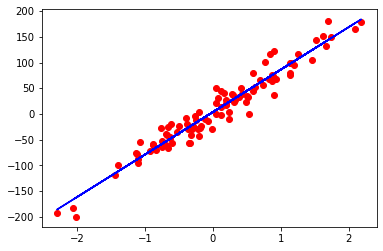

In [56]:
predicted = model(X).detach().numpy()
plt.plot(x_value,y_value,'ro')
plt.plot(x_value,predicted,'b')
plt.show()